# 環境構築



*   Pythonモジュールへのパス追加





In [1]:
!pwd

/mnt/MachineLearning/NoteBook/NumDropletsRoI


In [1]:
# import os

# os.chdir("/mnt/MachineLearning")

In [2]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

In [3]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import interpolate
import show_mod

# 前処理

In [4]:
#読み込むデータのパスの設定

# data_path = './data'
# input_list = glob.glob(data_path+"/*"+"/inputdata.csv")

# input_list

In [5]:
#input(空調条件等)の読み込み
# df_input = None

# for input_fname in input_list:
#     df_read = pd.read_csv(input_fname, index_col="case_name")
#     if df_input is None:
#         df_input = df_read
#     else:
#         df_input = pd.concat([df_input, df_read])

# df_input

In [6]:
#空調条件のみ抽出
# df_meta = df_input.loc[:, ['aircon', 'ventilation', 'exhaust']]

# df_meta

In [7]:
#排気口位置a,b,offをダミー変数化

# df_meta = pd.get_dummies(df_meta, columns=['exhaust'])
# # dummies = pd.get_dummies(df_input['exhaust'])
# # df_input.drop("exhaust", axis=1, inplace=True)
# # df_input = pd.concat([df_input, dummies], axis=1)
# # df_input = df_input.reindex(columns=['aircon','ventilation','exhaust_a','b','off'
# #           ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
# #           ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
# #           ,"aircon_position_x","aircon_position_y"])

# df_meta

# データ追加（2022/10/26）

- データ数：from 263 to 431
- オフィス数：from 9 to 15 (ID : 1,2,3,4,5,6,7,8,9,10,14,15,16,22,28)

In [8]:
# df_count = pd.read_csv("./CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv", index_col="casename")
df_count = pd.read_csv("/mnt/MachineLearning/CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv")
df_count

,casename,num_drop,volume[ml],RoI
0,office2_0_0,6739.4,0.000067,204.224242
1,office2_0_164_aout,7865.4,0.000063,238.345455
2,office2_0_164_bout,6049.8,0.000062,183.327273
3,office2_0_246_aout,7934.4,0.000050,240.436364
4,office2_0_246_bout,7662.0,0.000082,232.181818
...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727
427,office3_960_246_aout,4428.0,0.000073,134.181818
428,office3_960_246_bout,3890.0,0.000066,117.878788
429,office3_960_82_aout,5221.2,0.000072,158.218182


In [9]:
def get_val_from_casename(casename:str, index:int):
    return float(casename.split("_")[index])

print(get_val_from_casename("office2_0_164_aout", 2))

164.0


In [10]:
def get_exhaust_from_casename(casename:str):
    s_split = casename.split("_")
    if len(s_split) == 4:
        exhaust_str = s_split[3]
        if exhaust_str == "aout":
            exhaust = "a"
        elif exhaust_str == "bout":
            exhaust = "b"
    else:
        exhaust = "off"
        
    return exhaust

print(get_exhaust_from_casename("office2_0_164"))

off


In [11]:
# df_count["aircon"] = df_count["casename"].apply(get_val_from_casename, args=(1,))
# df_count["ventilation"] = df_count["casename"].apply(get_val_from_casename, args=(2,))
# df_count["exhaust"] = df_count["casename"].apply(get_exhaust_from_casename)
                                                     
# df_count

In [12]:
# df_summary = df_count

In [13]:
# df_summary.to_csv("/mnt/MachineLearning/data/summary_221015.csv", index=False)

# データ取り込み

In [4]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_20221202.csv")

df_summary

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,count_sum,count_timeMean
0,office2_0_0,office2,0.0,0.0,off,6739.4,204.224242,542230.0,902.212978
1,office2_0_164_aout,office2,0.0,164.0,a,7865.4,238.345455,357158.0,594.272879
2,office2_0_164_bout,office2,0.0,164.0,b,6049.8,183.327273,260040.0,432.678869
3,office2_0_246_aout,office2,0.0,246.0,a,7934.4,240.436364,196341.6,326.691514
4,office2_0_246_bout,office2,0.0,246.0,b,7662.0,232.181818,338083.8,562.535441
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,b,5117.4,155.072727,468402.6,779.372047
427,office3_960_246_aout,office3,960.0,246.0,a,4428.0,134.181818,999154.6,1662.486855
428,office3_960_246_bout,office3,960.0,246.0,b,3890.0,117.878788,807346.4,1343.338436
429,office3_960_82_aout,office3,960.0,82.0,a,5221.2,158.218182,679656.2,1130.875541


In [5]:
#排気口位置a,b,offをダミー変数化

df_total = pd.get_dummies(df_summary, columns=['exhaust'])
df_total

,case_name,office,aircon,ventilation,n_from2sec,n_from2sec/S,count_sum,count_timeMean,exhaust_a,exhaust_b,exhaust_off
0,office2_0_0,office2,0.0,0.0,6739.4,204.224242,542230.0,902.212978,0,0,1
1,office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,357158.0,594.272879,1,0,0
2,office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,260040.0,432.678869,0,1,0
3,office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,196341.6,326.691514,1,0,0
4,office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,338083.8,562.535441,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,468402.6,779.372047,0,1,0
427,office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,999154.6,1662.486855,1,0,0
428,office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,807346.4,1343.338436,0,1,0
429,office3_960_82_aout,office3,960.0,82.0,5221.2,158.218182,679656.2,1130.875541,1,0,0


In [6]:
df_total = df_total.set_index('case_name')

In [7]:
# # df_meta.join(df_count)
# df_total = pd.merge(df_meta, df_count, left_index=True, right_index=True)

# df_total

In [8]:
df_total.std(numeric_only=True)

aircon               360.876287
ventilation           83.985694
n_from2sec           921.844114
n_from2sec/S          36.376848
count_sum         131824.640295
count_timeMean       219.342164
exhaust_a              0.495869
exhaust_b              0.495869
exhaust_off            0.344132
dtype: float64

In [9]:
from sklearn import preprocessing

#入力データの標準化
stdscaler = preprocessing.StandardScaler()
df_meta = df_total[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]
stdscaler.fit(df_meta)
df_meta_array = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_array, index=df_total.index, columns=df_meta.columns)
# df_total_standardized = pd.DataFrame(df_total_tf, index=df_total.index, columns=df_total.columns)
df_meta_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249
...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249


In [10]:
# import numpy as np
# import pointCloud_sampling as pcs

# # rng = np.random.default_rng()

# #予め点群をサンプリングしておいたものを取得
# sampledPointCloud_dict = pcs.read_sampledPointCloud('/content/drive/MyDrive/ML/PointNetTrial/data/pointCloud_sampled')

# sampledPointCloud_dict

In [11]:
officemodel_path = '/mnt/MachineLearning/Office3DModel/model_origin'
# office_list = os.listdir(officemodel_path)
# case_list = [s.replace('office', 'case') for s in os.listdir(data_path)]
case_list = os.listdir(officemodel_path)
print(case_list)
# office_list = ['office1', 'office2', 'office3', 'office7', 'office10', 'office15', 'office16', 'office22', 'office28']
# print(office_list)

['case1', 'case10', 'case11', 'case12', 'case13', 'case14', 'case15', 'case16', 'case17', 'case18', 'case19', 'case2', 'case20', 'case21', 'case22', 'case23', 'case24', 'case25', 'case26', 'case27', 'case28', 'case29', 'case3', 'case30', 'case31', 'case32', 'case33', 'case4', 'case5', 'case6', 'case7', 'case8', 'case9']


点数memo

- aircon: 580
- airvent: 8
- room: 20
- desks: 1800~1825
- bosy: 約26500

In [129]:
import os
import random
import numpy as np
import json
import glob
from stl import mesh
from enum import Enum, auto

# 列挙型の定義
class OfficePart(Enum):
    aircon = auto()
    airvent = auto()
    body = auto()
    room = auto()
    desks = auto()


"""
データの前処理

オフィスモデル（STLファイル）を読み込み、点群情報のみ取り出し、
ランダムサンプリングで指定個の点群(ndarray)にする。


aircon: air conditioner
airvent: hole of Air vent
body: body of human
layout: deskd and walls
"""


# 列挙型のメンバーの列挙
for part in OfficePart:
    print(part)
    
NUM_POINTS = 2048

pointCloud_dict = {}
for casename in case_list:
    officename = casename.replace('case', 'office') 
    
    #まずは単純に読み込み、辞書に格納
    pc_dict = {}
    for part in OfficePart:
        path = officemodel_path + '/' + casename + '/' + part.name
        # print(path)
        stl_list = glob.glob(path + "/*.stl")
        # print(stl_list)
        pc_list = []
        for stlfname in stl_list:
            for mesh_read in mesh.Mesh.from_multi_file(stlfname):
                points = mesh_read.points.reshape([-1, 3])
                pc_list.append(points)

        points_concat = np.concatenate(pc_list)
        points_concat = np.unique(points_concat, axis=0)
        pc_dict[part] = points_concat.copy()
                        
            
    """
    ここから都合合わせのため調整
    """
    pc_dict_modified = {}

    pc_dict_modified["aircon"] = pc_dict[OfficePart.aircon]
    pc_dict_modified["airvent"] = pc_dict[OfficePart.airvent]
    
    pc_body = pc_dict[OfficePart.body]
    rand_list = random.sample(range(len(pc_body)), k=2048)
    pc_dict_modified["body"] = pc_body[rand_list, :]
    
    pc_room = pc_dict[OfficePart.room]
    num_sampling_desks = 1024 - len(pc_room)
    print("num_sampling_desks = ", num_sampling_desks)
    pc_desks = pc_dict[OfficePart.desks]
    rand_list = random.sample(range(len(pc_desks)), k=num_sampling_desks)
    pc_sampled_desks = pc_desks[rand_list, :]
    pc_dict_modified["layout"] = np.concatenate([pc_room, pc_sampled_desks])
    
    
    pointCloud_dict[officename] = pc_dict_modified


OfficePart.aircon
OfficePart.airvent
OfficePart.body
OfficePart.room
OfficePart.desks
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  940
num_sampling_desks =  940
num_sampling_desks =  940
num_sampling_desks =  940
num_sampling_desks =  940
num_sampling_desks =  940
num_sampling_desks =  946
num_sampling_desks =  946
num_sampling_desks =  1004
num_sampling_desks =  946
num_sampling_desks =  946
num_sampling_desks =  946
num_sampling_desks =  946
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004


In [13]:
pcFilePath = '/mnt/MachineLearning/Office3DModel/PointCloud_separated/dict.npy'

In [14]:
# import numpy as np

# np.save(pcFilePath, pointCloud_dict, allow_pickle='TRUE')

In [15]:
import numpy as np

a = np.load(pcFilePath, allow_pickle='TRUE')    # 0-D Array で返ってくる
pointCloud_dict = a.item()
pointCloud_dict

{'office1': {'aircon': array([[2.5  , 2.25 , 2.6  ],
         [2.5  , 2.375, 2.6  ],
         [2.5  , 2.45 , 2.6  ],
         ...,
         [3.5  , 3.05 , 2.6  ],
         [3.5  , 3.125, 2.6  ],
         [3.5  , 3.25 , 2.6  ]], dtype=float32),
  'airvent': array([[2.825, 1.025, 2.6  ],
         [2.825, 1.375, 2.6  ],
         [2.825, 4.125, 2.6  ],
         [2.825, 4.475, 2.6  ],
         [3.175, 1.025, 2.6  ],
         [3.175, 1.375, 2.6  ],
         [3.175, 4.125, 2.6  ],
         [3.175, 4.475, 2.6  ]], dtype=float32),
  'body': array([[3.098921 , 2.69311  , 0.1438653],
         [1.647102 , 3.116968 , 0.7697402],
         [2.840412 , 1.10439  , 1.45508  ],
         ...,
         [3.304059 , 3.177919 , 1.376374 ],
         [1.310924 , 1.471932 , 0.3961929],
         [3.261433 , 3.166402 , 1.266208 ]], dtype=float32),
  'layout': array([[0.    , 0.    , 0.    ],
         [0.    , 0.    , 2.6   ],
         [0.    , 5.5   , 0.    ],
         ...,
         [1.72  , 3.485 , 0.53  ],
     

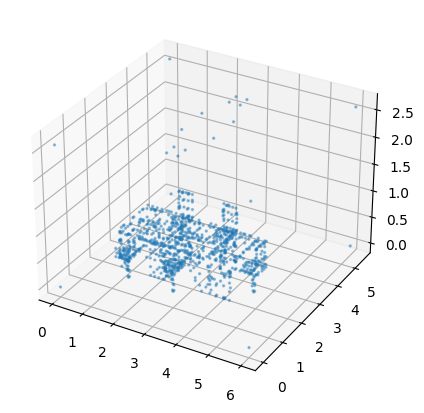

In [16]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(pointCloud_dict['office1']["layout"])

In [17]:
# import numpy as np
# '''
# 点群シャッフルによるデータ増強
# よく考えると無意味だと思う
# '''
# rng = np.random.default_rng()

# pointCloud_augumented_dict = {}
# for office_name, pointCloud in sampledPointCloud_dict.items():
#     pc_list = []
#     for i in range(4):
#         pc = pointCloud.copy()

#         if i >= 1:
#             #点群のシャッフル
#             rng.shuffle(pc)

#         pc_list.append(pc)

#     pointCloud_augumented_dict[office_name] = pc_list

# pointCloud_augumented_dict

In [18]:
# plot3d_points(pointCloud_augumented_dict['office10'][0])
# plot3d_points(pointCloud_augumented_dict['office10'][1])
# plot3d_points(pointCloud_augumented_dict['office10'][2])
# plot3d_points(pointCloud_augumented_dict['office10'][3])

In [19]:
# def get_augumented_dataset():
#     '''
#     点群データ増強に合わせて、メタデータや感染リスク分布のデータも複製して増やす
#     '''
#     case_index_list = list(df_total.index)
#     # case_index_list = list(df_total["casename"])


#     case_index_augumented_list = []

#     pointCloudArray_list = []
#     metaArray_list = []

#     RoI_list = []

#     for case_index in case_index_list:
#         office_name = case_index.split('_', maxsplit=1)[0]
#         pc_list = pointCloud_augumented_dict[office_name]
#         for augumentID, pointCloud in enumerate(pc_list):
#             case_index_augumented_list.append(case_index + '-' + str(augumentID))
#             pointCloudArray_list.append(pointCloud)
#             metaArray_list.append(df_meta_standardized.loc[case_index])
#             # RoI_list.append(df_total["RoI"].loc[case_index])
#             RoI_list.append(df_total["count_timeMean"].loc[case_index])

#     case_index_array = np.array(case_index_augumented_list)
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pointCloudArray = np.array(pointCloudArray_list)
    
#     return case_index_array, pointCloudArray, metaArray, RoIArray

# X_index, X_pc, X_meta, y = get_augumented_dataset()

In [73]:
def get_dataset(df_main, df_meta):
    '''
    説明変数と目的変数をNDArrayに変換する
    '''
    case_index_list = list(df_main.index)
    # case_index_list = list(df_total["casename"])
    
    pc_aircon_list = []
    pc_airvent_list = []
    pc_body_list = []
    pc_layout_list = []
    
    metaArray_list = []

    RoI_list = []

    for case_index in case_index_list:
        office_name = case_index.split('_', maxsplit=1)[0]
        pc_aircon_list.append(pointCloud_dict[office_name]["aircon"])
        pc_airvent_list.append(pointCloud_dict[office_name]["airvent"])
        pc_body_list.append(pointCloud_dict[office_name]["body"])
        pc_layout_list.append(pointCloud_dict[office_name]["layout"])
        
        metaArray_list.append(df_meta_standardized.loc[case_index])
            
        RoI_list.append(df_main["n_from2sec/S"].loc[case_index])
        # RoI_list.append(df_main["count_timeMean"].loc[case_index])

    case_index_array = np.array(case_index_list)
    metaArray = np.array(metaArray_list)
    RoIArray = np.array(RoI_list)

    pc_aircon_array = np.array(pc_aircon_list)
    pc_airvent_array = np.array(pc_airvent_list)
    pc_body_array = np.array(pc_body_list)
    pc_layout_array = np.array(pc_layout_list)
    
    pc_array_dict = {"aircon":pc_aircon_array, "airvent":pc_airvent_array, "body":pc_body_array, "layout":pc_layout_array}
    
    return case_index_array, pc_array_dict, metaArray, RoIArray.reshape(-1,1)


In [74]:
X_index, X_pc_dict, X_meta, y = get_dataset(df_total, df_meta)

# print(X_pc.max())
# X_pc /= X_pc.max() #Normalization
# print(X_pc.max())

for key, X_pc in X_pc_dict.items():
    #Standardization
    X_pc_dict[key] = ( X_pc - X_pc.mean() ) / X_pc.std()
    
    
# l_mul = map(lambda X_pc: ( X_pc - X_pc.std() ) / X_pc.std(), X_pc_list)
# # print(list(l_mul))

# X_pc_airvent.std()

In [75]:
X_pc_dict["airvent"].std()

1.0

In [80]:
import sys

def standardization_test(X:np.ndarray):
    """
    標準化されているかをテスト
    """
    threshold = 1.e-5
    
    if abs(X.mean()) > threshold:
        sys.stderr.write(f'StandardizationError: mean= {X.mean()}\n')
        
    if abs(X.std() - 1.) > threshold:
        sys.stderr.write(f'StandardizationError: std= {X.std()}')
        

In [87]:
print(X_index.shape)


print("=============pointClouds=============")
for key, X_pc in X_pc_dict.items():
    standardization_test(X_pc)
    print(key)
    print(X_pc.shape, X_pc.mean(), X_pc.var())
print("=====================================")
    
print(X_meta.shape, X_meta.mean(), X_meta.var())

print(y.shape, y.mean(), y.var())

(431,)
=============pointClouds=============
aircon
(431, 580, 3) -5.270604e-07 0.9999996
airvent
(431, 8, 3) 3.0240253e-07 1.0
body
(431, 2048, 3) -6.574547e-07 0.99999934
layout
(431, 1024, 3) 1.1078258e-06 1.0
(431, 5) 2.885034309930801e-17 1.0
(431, 1) 161.90224687039753 1320.2047924213653


In [82]:
X_index

array(['office2_0_0', 'office2_0_164_aout', 'office2_0_164_bout',
       'office2_0_246_aout', 'office2_0_246_bout', 'office2_0_82_aout',
       'office2_0_82_bout', 'office2_360_0', 'office2_360_164_aout',
       'office2_360_164_bout', 'office2_360_246_aout',
       'office2_360_246_bout', 'office2_360_82_aout',
       'office2_360_82_bout', 'office2_660_0', 'office2_660_164_aout',
       'office2_660_164_bout', 'office2_660_246_aout',
       'office2_660_246_bout', 'office2_660_82_aout',
       'office2_660_82_bout', 'office2_960_0', 'office2_960_164_aout',
       'office2_960_164_bout', 'office2_960_246_aout',
       'office2_960_246_bout', 'office2_960_82_aout',
       'office2_960_82_bout', 'office15_0_0', 'office15_0_164_aout',
       'office15_0_164_bout', 'office15_0_246_aout',
       'office15_0_246_bout', 'office15_0_82_aout', 'office15_0_82_bout',
       'office15_360_0', 'office15_360_164_aout', 'office15_360_164_bout',
       'office15_360_246_aout', 'office15_360_246_bou

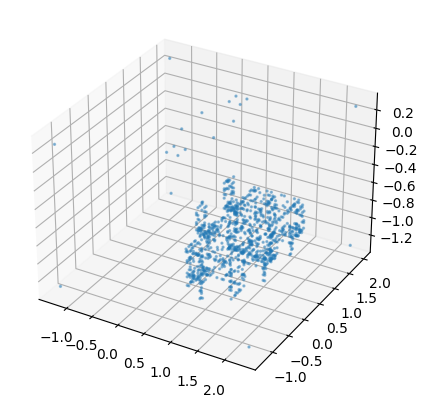

In [85]:
plot3d_points(X_pc_dict["layout"][0, :,:])

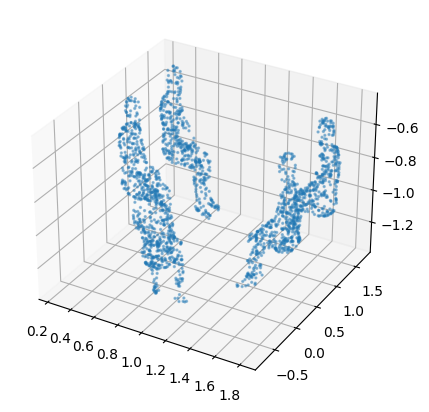

In [86]:
plot3d_points(X_pc_dict["body"][0, :,:])

# チューニング

In [88]:
import random

def train_test_office_split(office_for_test:str, case_index_array, train_shuffle:bool):
    '''
    特定のofficeだけ、テスト用に分割。
    '''
    train_ID = []
    test_ID = []

    for (ID, case_index) in enumerate(case_index_array):
        if office_for_test+'_' in case_index:
            test_ID.append(ID) 
        else:
            train_ID.append(ID)
    
    if train_shuffle:
        random.shuffle(train_ID)
    
    return train_ID, test_ID

In [89]:
casename_list = list(df_total.index)

office_list = []

for casename in casename_list:
    officename = casename.split('_')[0]
    if officename not in office_list:
        office_list.append(officename)

office_list

['office2',
 'office15',
 'office14',
 'office1',
 'office22',
 'office6',
 'office4',
 'office16',
 'office8',
 'office9',
 'office7',
 'office10',
 'office28',
 'office5',
 'office3']

In [90]:
# test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]
test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]

In [91]:
for test_office in test_office_list:
    print("test_office:", test_office)
    fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
    print(len(fit_ID), len(test_ID))
    X_index_fit = X_index[fit_ID]
    
    X_pc_fit, X_pc_test = X_pc[fit_ID], X_pc[test_ID]
    X_meta_fit, X_meta_test = X_meta[fit_ID], X_meta[test_ID]
    y_fit, y_test = y[fit_ID], y[test_ID]
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    
    for val_office in val_office_list:
        print("val_office:", val_office)
        train_ID, val_ID = train_test_office_split(val_office, X_index_fit, train_shuffle=True)
        print(len(train_ID), len(val_ID))
        
        X_pc_train, X_pc_val = X_pc_fit[train_ID], X_pc_fit[val_ID]
        X_meta_train, X_meta_val = X_meta_fit[train_ID], X_meta_fit[val_ID]
        y_train, y_val = y_fit[train_ID], y_fit[val_ID]
    
        print(X_index_fit[train_ID])


test_office: office1
392 39
val_office: office7
364 28
['office3_360_246_bout' 'office6_0_164_bout' 'office22_0_246_bout'
 'office8_960_246_aout' 'office28_660_246_bout' 'office4_0_0'
 'office2_0_82_bout' 'office16_360_0' 'office9_0_164_bout'
 'office2_960_246_aout' 'office5_0_82_aout' 'office5_360_246_bout'
 'office3_660_246_aout' 'office22_660_246_bout' 'office8_660_0'
 'office9_960_246_bout' 'office15_360_82_aout' 'office9_660_82_aout'
 'office28_960_82_aout' 'office14_0_82_aout' 'office2_960_164_aout'
 'office28_360_82_aout' 'office14_960_246_bout' 'office28_660_82_aout'
 'office8_0_164_aout' 'office5_960_246_bout' 'office9_960_246_aout'
 'office2_660_0' 'office2_660_164_aout' 'office3_0_0' 'office8_0_246_aout'
 'office5_0_164_aout' 'office15_960_82_aout' 'office9_660_0'
 'office6_360_246_aout' 'office14_0_82_bout' 'office22_960_246_aout'
 'office3_960_246_bout' 'office4_0_164_bout' 'office3_960_0'
 'office22_960_164_aout' 'office8_360_246_bout' 'office6_960_0'
 'office3_960_82_aou

In [92]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16380144234904251704
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9990176768
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9682820185629079973
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2022-12-13 01:04:36.552116: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-13 01:04:37.088374: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /device:GPU:0 with 9527 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [93]:
# def conv_bn(x, filters):
#     x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
#     x = layers.BatchNormalization(momentum=0.0)(x)
#     return layers.Activation("relu")(x)


In [97]:
from tensorflow import keras

def myPointNet(trial, input_pointCloud:keras.Input, suffix:str):
    
    hp_conv_layers = trial.suggest_int(f'conv_layers_{suffix}', 1, 3, step=1)
    
    x = input_pointCloud
    for i in range(hp_conv_layers):
        hp_filters = trial.suggest_int(f'filters_{suffix}-{i}', 32, 256, step=32)
        
        x = keras.layers.Conv1D(hp_filters, kernel_size=1, padding="valid")(x)

        x = keras.layers.BatchNormalization(momentum=0.99)(x)
            
        x = keras.layers.ReLU()(x)
    
    return keras.layers.GlobalMaxPooling1D()(x)

In [112]:
from PointNet import conv_bn
from tensorflow import keras

db_path = '/mnt/MachineLearning/OptunaLog/separatePointCloud_study.db'


def total_model_builder(trial):
    """
    感染リスク分布予測モデル

    順序不変性モデルに、メタデータ（空調条件）を合流させ、MLPで感染リスク予測

    KerasTunerから呼び出され、ハイパーパラメータをチューニングする
    """
    input_meta = keras.Input(shape=(X_meta.shape[1], ), name='meta')
    
    input_list = [input_meta]
    features_list = [input_meta]
    for key, X_pc in X_pc_dict.items():
        input_pc = keras.Input(shape=(X_pc.shape[1], 3), name=f'pointCloud_{key}')
        
        # append pointClouds to input_list
        input_list.append(input_pc)
        
        # append feturesOfPointClouds to features_list
        features_list.append(myPointNet(trial, input_pointCloud=input_pc, suffix=key))
        
    
    x = keras.layers.Concatenate()(features_list)
    
    hp_dense_layers = trial.suggest_int('dense_layers', 0, 4, step=1)
    if hp_dense_layers > 0:
        hp_activation = trial.suggest_categorical('activation', ["ReLU", "LeakyReLU", "ELU"])
        hp_dropout = trial.suggest_categorical('dropout', [None, 0.3, 0.5])
    
    for i in range(hp_dense_layers):
        hp_units = trial.suggest_int(f'units-{i}', 64, 512, step=64)
        x = keras.layers.Dense(hp_units)(x)
        
        if hp_activation == "ReLU":
            x = keras.layers.ReLU()(x)
        elif hp_activation == "LeakyReLU":
            x = keras.layers.LeakyReLU()(x)
        elif hp_activation == "ELU":
            x = keras.layers.ELU()(x)
            
        if hp_dropout is not None:
            x = keras.layers.Dropout(hp_dropout)(x)

    outputs = keras.layers.Dense(1)(x)

#     hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    hp_learning_rate = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    model = keras.Model(inputs=input_list, outputs=outputs, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#         optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
        loss='mse',
        metrics=['mae']
        )

    return model


from tensorflow.keras.callbacks import EarlyStopping
import optuna
from keras.backend import clear_session

# 1. Define an objective function to be maximized.
# def objective(trial, X_dict_train, y_train, X_dict_val, y_val):
def objective(trial, X_index_fit, X_dict_fit, y_fit, val_office_list):
    # Clear clutter from previous Keras session graphs.
    clear_session()

    mse_max_list = []
    
    for val_office in val_office_list:
        train_ID, val_ID = train_test_office_split(val_office, X_index_fit, train_shuffle=True)
    
        y_train, y_val = y_fit[train_ID], y_fit[val_ID]
        
        X_dict_train={}
        X_dict_val={}
        for key, X in X_dict_fit.items():
            X_dict_train[key], X_dict_val[key] = X_dict_fit[key][train_ID], X_dict_fit[key][val_ID]
    
        model = total_model_builder(trial)

        hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32, 64, 128, 256])
    #     hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 64, 128, 256, 512])

        history = model.fit(
            X_dict_train, y_train,
            validation_data = (X_dict_val, y_val),
            epochs = 200,
            batch_size=hp_batch_size,
            callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)],
            verbose=False,
        )

        #履歴の最後の１０エポック
        val_loss_list = history.history['val_loss'][-10:] #List of MSE
        
        # evaluate = model.evaluate({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val, verbose=0)

        mse_max_list.append(np.max(val_loss_list)) #終盤の誤差の最大値（振動抑制が目的）
        # mse_min_list.append(np.min(val_loss_list)) #終盤の誤差の最小値（振動抑制が目的）
        
    #交差検証の結果の平均値を目的関数
    return np.mean(mse_max_list)#, np.mean(mse_min_list)


In [113]:
X_dict = {'meta':X_meta}
for key, X_pc in X_pc_dict.items():
    X_dict[f'pointCloud_{key}'] = X_pc
X_dict

{'meta': array([[-1.38455178, -1.66695169, -0.87131147, -0.87131147,  2.51099278],
        [-1.38455178,  0.28803111,  1.14769521, -0.87131147, -0.39824886],
        [-1.38455178,  0.28803111, -0.87131147,  1.14769521, -0.39824886],
        ...,
        [ 1.27873108,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108, -0.68946029,  1.14769521, -0.87131147, -0.39824886],
        [ 1.27873108, -0.68946029, -0.87131147,  1.14769521, -0.39824886]]),
 'pointCloud_aircon': array([[[-0.6557848 , -0.99450046, -0.52029866],
         [-0.6557848 , -0.8251426 , -0.52029866],
         [-0.6557848 , -0.72352785, -0.52029866],
         ...,
         [ 0.6990778 ,  0.08938958, -0.52029866],
         [ 0.6990778 ,  0.19100434, -0.52029866],
         [ 0.6990778 ,  0.36036217, -0.52029866]],
 
        [[-0.6557848 , -0.99450046, -0.52029866],
         [-0.6557848 , -0.8251426 , -0.52029866],
         [-0.6557848 , -0.72352785, -0.52029866],
         ...,
         [ 0.6990778 ,  0

In [114]:
"""
最終テスト用オフィスを切り替えながらチューニング実行
"""

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
    X_index_fit = X_index[fit_ID]
    
    X_dict_fit={}
    X_dict_test={}
    for key, X in X_dict.items():
        X_dict_fit[key], X_dict_test[key] = X_dict[key][fit_ID], X_dict[key][test_ID]
    
    y_fit, y_test = y[fit_ID], y[test_ID]
    
    study_name = test_office + '_is_test'

    # 3. Create a study object and optimize the objective function.
    # study = optuna.create_study(direction='minimize')
    study = optuna.create_study(
        sampler=optuna.samplers.RandomSampler(),
        direction='minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

    study.optimize(
        lambda trial: objective(trial, X_index_fit, X_dict_fit, y_fit, val_office_list),
        n_trials=200,
        gc_after_trial=True
    )


[I 2022-12-13 02:09:15,694] Using an existing study with name 'office1_is_test' instead of creating a new one.


test_office: office1


[I 2022-12-13 02:09:39,303] Trial 3 finished with value: 9464.975830078125 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 160, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 64, 'lr': 0.027722286769315638, 'batch_size': 256}. Best is trial 3 with value: 9464.975830078125.
[I 2022-12-13 02:11:08,384] Trial 4 finished with value: 1552.47177734375 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 256, 'filters_layout-2': 256, 'dense_layers': 0, 'lr': 5.818742398806216e-05, 'batch_size': 4}. Best is trial 4 with value: 

test_office: office7


[I 2022-12-13 07:27:29,949] Trial 0 finished with value: 6830.414526367187 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 128, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 192, 'units-2': 384, 'lr': 0.06274240431669598, 'batch_size': 16}. Best is trial 0 with value: 6830.414526367187.
[I 2022-12-13 07:30:36,355] Trial 1 finished with value: 2939.613494873047 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 96, 'filters_aircon-2': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 32, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filt

test_office: office10


[I 2022-12-13 13:51:58,993] Trial 0 finished with value: 15233.1421875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 32, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 64, 'filters_layout-2': 192, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 448, 'units-2': 448, 'units-3': 384, 'lr': 0.0010399851703774153, 'batch_size': 256}. Best is trial 0 with value: 15233.1421875.
[I 2022-12-13 13:52:46,898] Trial 1 finished with value: 1835.5079833984375 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 160, 'dense_layer

test_office: office16


[I 2022-12-13 19:07:55,937] Trial 0 finished with value: 3411.6549072265625 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 128, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 0, 'lr': 0.00825388702462815, 'batch_size': 128}. Best is trial 0 with value: 3411.6549072265625.
[I 2022-12-13 19:09:15,072] Trial 1 finished with value: 1283.310321044922 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 160, 'filters_aircon-2': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 256, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 160, 'filters_layout-2': 160, 'dense_layers': 0, 'lr': 0.002091333349713757, 'batch_size': 4}. Best is trial 1 with value: 1283.310321044922.
[I 2022-12-13 19:11:43,6

test_office: office22


[I 2022-12-14 00:54:49,740] A new study created in RDB with name: office22_is_test
[I 2022-12-14 00:55:48,383] Trial 0 finished with value: 901.8449462890625 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 256, 'filters_airvent-2': 256, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 224, 'filters_layout-2': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 448, 'lr': 0.001545452779372806, 'batch_size': 16}. Best is trial 0 with value: 901.8449462890625.
[I 2022-12-14 00:57:45,713] Trial 1 finished with value: 907.624789428711 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 160, 'filters_body-2': 256, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_l

test_office: office28


[I 2022-12-14 06:33:15,685] Trial 0 finished with value: 2615.4568786621094 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 64, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 512, 'units-2': 512, 'units-3': 128, 'lr': 0.0004373733279361204, 'batch_size': 256}. Best is trial 0 with value: 2615.4568786621094.
[I 2022-12-14 06:35:28,774] Trial 1 finished with value: 4994.20966796875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 128, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layer

In [126]:
"""
最終テストをオフィス10に絞ってチューニング実行
"""

test_office = "office10"

print("test_office:", test_office)
fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
X_index_fit = X_index[fit_ID]

X_dict_fit={}
X_dict_test={}
for key, X in X_dict.items():
    X_dict_fit[key], X_dict_test[key] = X_dict[key][fit_ID], X_dict[key][test_ID]

y_fit, y_test = y[fit_ID], y[test_ID]

study_name = test_office + '_is_test'

# 3. Create a study object and optimize the objective function.
# study = optuna.create_study(direction='minimize')
study = optuna.create_study(
    # sampler=optuna.samplers.RandomSampler(),
    direction='minimize',
    study_name=study_name,
    storage='sqlite:///'+db_path,
    load_if_exists=True
)

val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

study.optimize(
    lambda trial: objective(trial, X_index_fit, X_dict_fit, y_fit, val_office_list),
    n_trials=200,
    gc_after_trial=True
)


[I 2022-12-15 02:54:54,247] Using an existing study with name 'office10_is_test' instead of creating a new one.


test_office: office10


[I 2022-12-15 02:57:05,784] Trial 200 finished with value: 592.4658142089844 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 128, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 384, 'units-2': 320, 'lr': 0.0007333696269839007, 'batch_size': 64}. Best is trial 3 with value: 408.70652770996094.
[I 2022-12-15 02:59:14,748] Trial 201 finished with value: 549.7312103271485 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 128, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 1

# チューニング結果確認

In [115]:
import pandas as pd

def plot_history(history:dict, ymax:float=None):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss(MSE)")
    if ymax is not None:
        plt.ylim(0., ymax)
    plt.show()

    acc_df = history_df[["mae", "val_mae"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("MeanAbsoluteError")
    plt.show()

In [117]:
from keras.callbacks import TensorBoard
import datetime

tb_log_dir = "/mnt/MachineLearning/tblogs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("tb_log_dir = ", tb_log_dir)
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

"""
チューニング結果を確認するため、改めてチューニング時と同じデータセットで学習
最終テストは行わない
"""
tuning_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
    X_index_fit = X_index[fit_ID]
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    
    train_ID, val_ID = train_test_office_split(val_office_list[0], X_index_fit, train_shuffle=True)
    
    y_train, y_val = y_fit[train_ID], y_fit[val_ID]
        
    X_dict_train={}
    X_dict_val={}
    for key, X in X_dict_fit.items():
        X_dict_train[key], X_dict_val[key] = X_dict_fit[key][train_ID], X_dict_fit[key][val_ID]
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)
    
    print(best_model.summary())
    
    tuning_history = best_model.fit(
        X_dict_train, y_train,
        validation_data = (X_dict_val, y_val),
        epochs = 200,
        batch_size=loaded_study.best_params["batch_size"],
        callbacks = [
            EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10),
            TensorBoard(log_dir=tb_log_dir+"/"+test_office, histogram_freq=1, write_graph=True)
        ],
        # verbose=False,
    )

    tuning_dict[test_office] = {"best_trial":best_trial, "history":tuning_history}


tb_log_dir =  /mnt/MachineLearning/tblogs/20221215-020754
test_office: office1
Model: "predictionnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pointCloud_aircon (InputLayer)  [(None, 580, 3)]    0           []                               
                                                                                                  
 pointCloud_body (InputLayer)   [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d_53 (Conv1D)             (None, 580, 32)      128         ['pointCloud_aircon[0][0]']      
                                                                                                  
 conv1d_57 (Conv1D)             (None, 2048, 256)    1024        ['pointCloud_body[0][0]']        
       

In [118]:
tb_log_dir

'/mnt/MachineLearning/tblogs/20221215-020754'

In [119]:
%load_ext tensorboard

In [120]:
%tensorboard  --logdir $tb_log_dir

Best trial (test for office1):
  Value: 386.8915054321289
  Params: 
    activation: ELU
    batch_size: 64
    conv_layers_aircon: 3
    conv_layers_airvent: 1
    conv_layers_body: 3
    conv_layers_layout: 1
    dense_layers: 3
    dropout: None
    filters_aircon-0: 32
    filters_aircon-1: 192
    filters_aircon-2: 224
    filters_airvent-0: 224
    filters_body-0: 256
    filters_body-1: 224
    filters_body-2: 192
    filters_layout-0: 64
    lr: 8.976107170262151e-05
    units-0: 320
    units-1: 256
    units-2: 128


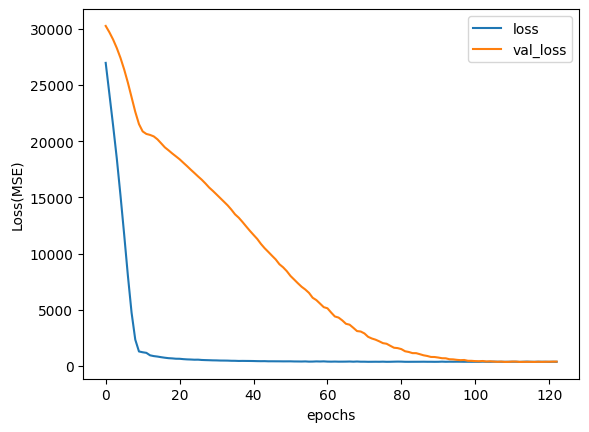

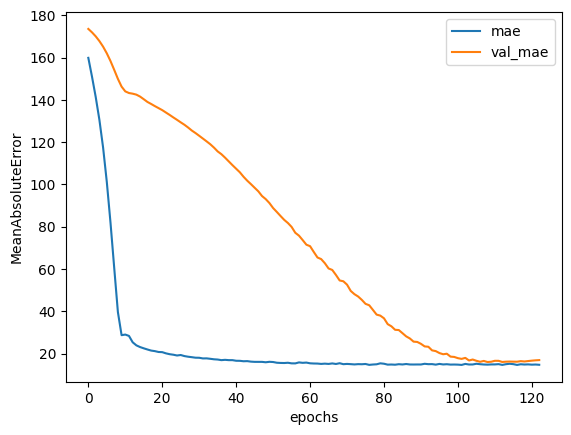

Best trial (test for office7):
  Value: 543.3518295288086
  Params: 
    activation: ELU
    batch_size: 64
    conv_layers_aircon: 3
    conv_layers_airvent: 3
    conv_layers_body: 2
    conv_layers_layout: 3
    dense_layers: 4
    dropout: None
    filters_aircon-0: 256
    filters_aircon-1: 192
    filters_aircon-2: 128
    filters_airvent-0: 96
    filters_airvent-1: 128
    filters_airvent-2: 224
    filters_body-0: 256
    filters_body-1: 64
    filters_layout-0: 224
    filters_layout-1: 160
    filters_layout-2: 192
    lr: 1.1257278546662467e-05
    units-0: 256
    units-1: 128
    units-2: 320
    units-3: 192


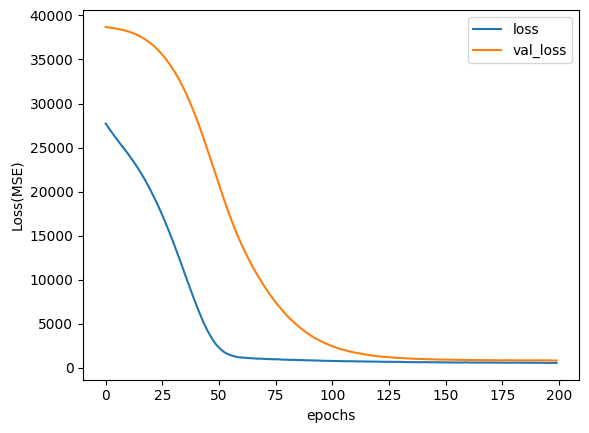

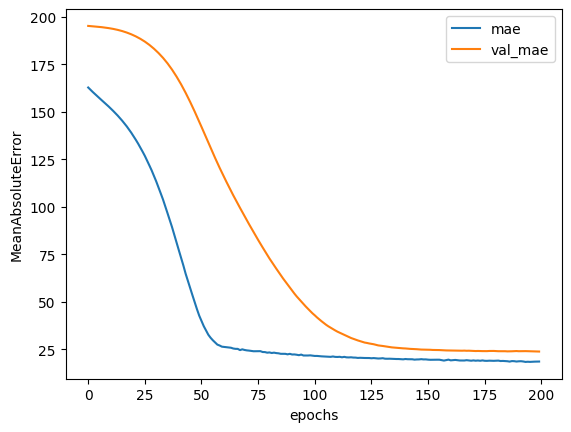

Best trial (test for office10):
  Value: 408.70652770996094
  Params: 
    activation: ELU
    batch_size: 32
    conv_layers_aircon: 2
    conv_layers_airvent: 2
    conv_layers_body: 3
    conv_layers_layout: 1
    dense_layers: 3
    dropout: None
    filters_aircon-0: 224
    filters_aircon-1: 224
    filters_airvent-0: 128
    filters_airvent-1: 64
    filters_body-0: 224
    filters_body-1: 96
    filters_body-2: 96
    filters_layout-0: 96
    lr: 2.259961164750641e-05
    units-0: 512
    units-1: 384
    units-2: 320


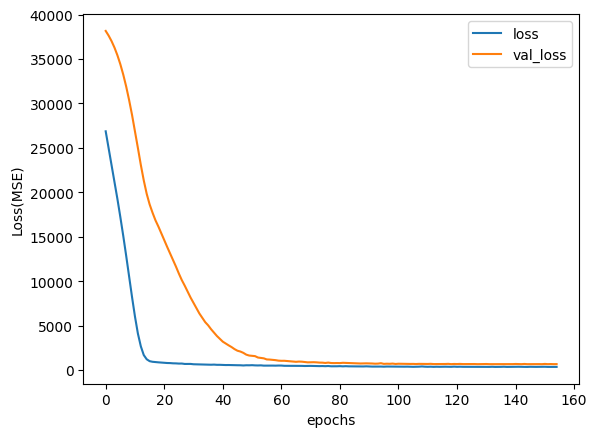

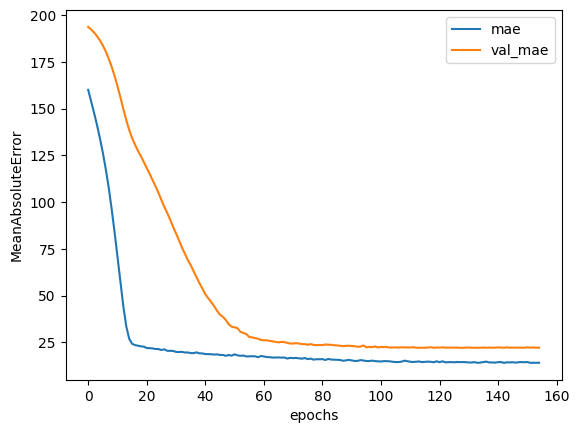

Best trial (test for office16):
  Value: 541.7028228759766
  Params: 
    activation: LeakyReLU
    batch_size: 64
    conv_layers_aircon: 1
    conv_layers_airvent: 3
    conv_layers_body: 2
    conv_layers_layout: 1
    dense_layers: 4
    dropout: None
    filters_aircon-0: 32
    filters_airvent-0: 192
    filters_airvent-1: 256
    filters_airvent-2: 96
    filters_body-0: 192
    filters_body-1: 128
    filters_layout-0: 160
    lr: 0.00017303353661973398
    units-0: 128
    units-1: 192
    units-2: 320
    units-3: 384


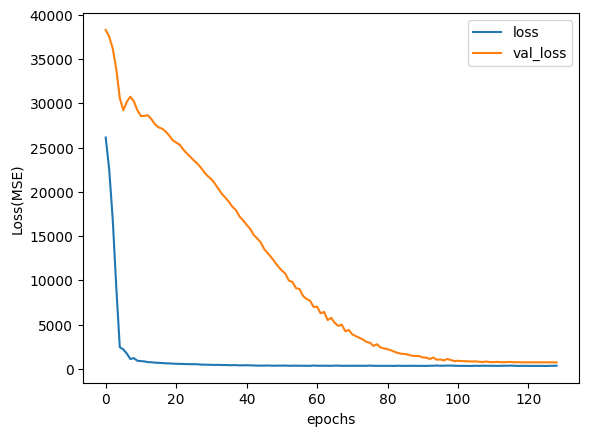

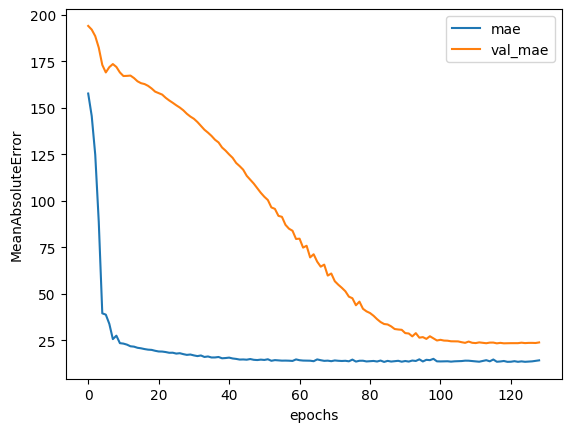

Best trial (test for office22):
  Value: 552.5176666259765
  Params: 
    activation: LeakyReLU
    batch_size: 32
    conv_layers_aircon: 3
    conv_layers_airvent: 1
    conv_layers_body: 3
    conv_layers_layout: 1
    dense_layers: 2
    dropout: 0.5
    filters_aircon-0: 32
    filters_aircon-1: 32
    filters_aircon-2: 128
    filters_airvent-0: 256
    filters_body-0: 32
    filters_body-1: 96
    filters_body-2: 160
    filters_layout-0: 224
    lr: 6.111377183013376e-05
    units-0: 320
    units-1: 256


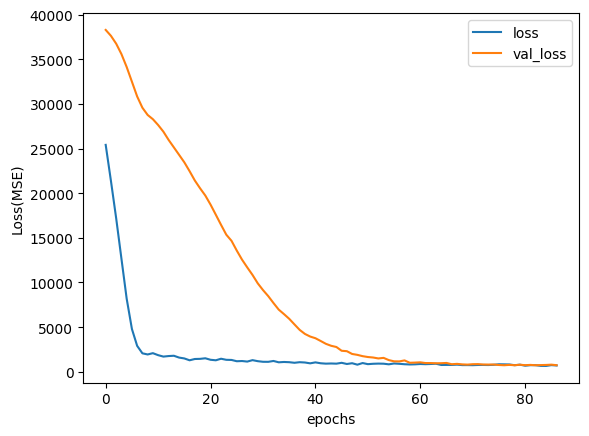

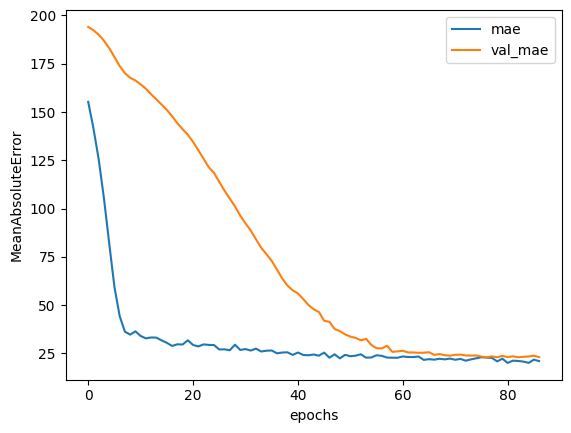

Best trial (test for office28):
  Value: 581.1790466308594
  Params: 
    batch_size: 64
    conv_layers_aircon: 1
    conv_layers_airvent: 1
    conv_layers_body: 3
    conv_layers_layout: 2
    dense_layers: 0
    filters_aircon-0: 256
    filters_airvent-0: 128
    filters_body-0: 160
    filters_body-1: 128
    filters_body-2: 32
    filters_layout-0: 64
    filters_layout-1: 96
    lr: 0.0005605830137360215


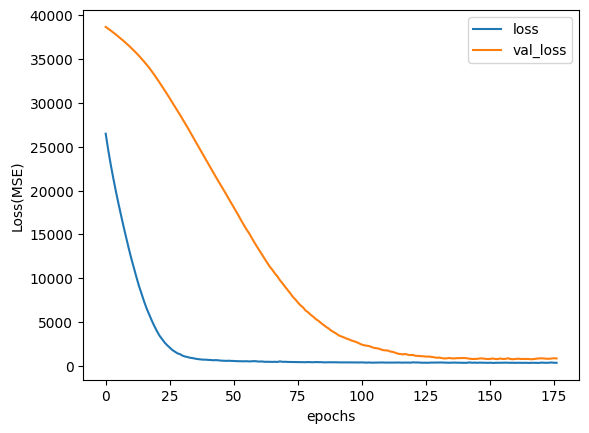

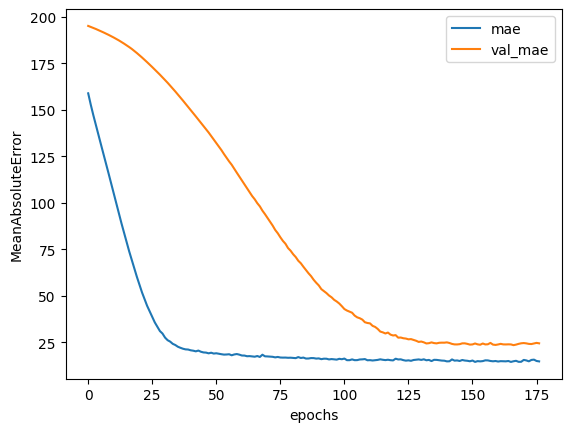

In [121]:
for test_office, result_dict in tuning_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    plot_history(result_dict["history"].history)

In [122]:
"""
最終テスト
チューナーに与えなかったオフィスを使って検証
"""

# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

test_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=True)
    X_index_fit = X_index[fit_ID]
    
    X_dict_fit={}
    X_dict_test={}
    for key, X in X_dict.items():
        X_dict_fit[key], X_dict_test[key] = X_dict[key][fit_ID], X_dict[key][test_ID]
    
    y_fit, y_test = y[fit_ID], y[test_ID]
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)

    test_history = best_model.fit(
        X_dict_fit, y_fit,
        batch_size = loaded_study.best_params["batch_size"],
        epochs = 200,
        validation_data = (X_dict_test, y_test),
        # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
    )
    
    test_dict[test_office] = {"best_trial":best_trial, "history":test_history}


test_office: office1
Epoch 1/200
7/7 [==============================] - 4s 121ms/step - loss: 25396.1582 - mae: 155.3155 - val_loss: 38284.4180 - val_mae: 194.0956
Epoch 2/200
7/7 [==============================] - 0s 42ms/step - loss: 22560.6016 - mae: 146.0071 - val_loss: 37647.5312 - val_mae: 192.4480
Epoch 3/200
7/7 [==============================] - 0s 41ms/step - loss: 20155.2559 - mae: 137.5542 - val_loss: 36933.7188 - val_mae: 190.5845
Epoch 4/200
7/7 [==============================] - 0s 42ms/step - loss: 17569.1387 - mae: 127.8418 - val_loss: 36078.1328 - val_mae: 188.3264
Epoch 5/200
7/7 [==============================] - 0s 40ms/step - loss: 14632.3096 - mae: 115.7807 - val_loss: 35039.8945 - val_mae: 185.5494
Epoch 6/200
7/7 [==============================] - 0s 43ms/step - loss: 11306.4092 - mae: 100.2952 - val_loss: 33791.8125 - val_mae: 182.1550
Epoch 7/200
7/7 [==============================] - 0s 43ms/step - loss: 7745.6006 - mae: 80.9986 - val_loss: 32348.3906 - val_

Best trial (test for office1):
  Value: 386.8915054321289
  Params: 
    activation: ELU
    batch_size: 64
    conv_layers_aircon: 3
    conv_layers_airvent: 1
    conv_layers_body: 3
    conv_layers_layout: 1
    dense_layers: 3
    dropout: None
    filters_aircon-0: 32
    filters_aircon-1: 192
    filters_aircon-2: 224
    filters_airvent-0: 224
    filters_body-0: 256
    filters_body-1: 224
    filters_body-2: 192
    filters_layout-0: 64
    lr: 8.976107170262151e-05
    units-0: 320
    units-1: 256
    units-2: 128


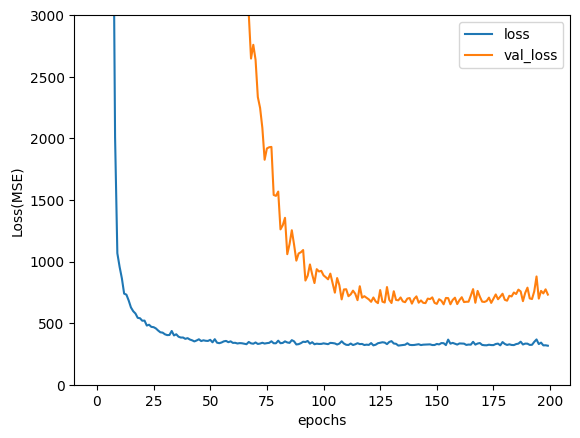

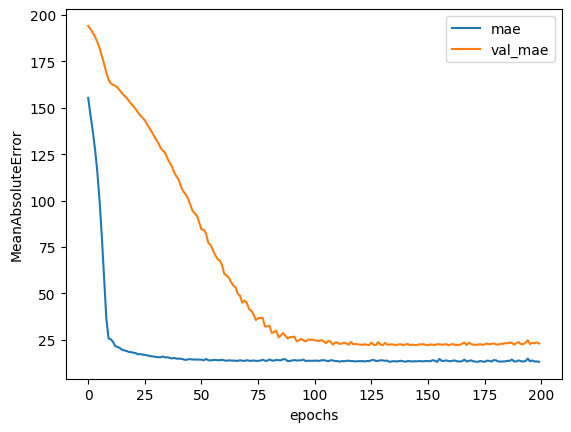

Best trial (test for office7):
  Value: 543.3518295288086
  Params: 
    activation: ELU
    batch_size: 64
    conv_layers_aircon: 3
    conv_layers_airvent: 3
    conv_layers_body: 2
    conv_layers_layout: 3
    dense_layers: 4
    dropout: None
    filters_aircon-0: 256
    filters_aircon-1: 192
    filters_aircon-2: 128
    filters_airvent-0: 96
    filters_airvent-1: 128
    filters_airvent-2: 224
    filters_body-0: 256
    filters_body-1: 64
    filters_layout-0: 224
    filters_layout-1: 160
    filters_layout-2: 192
    lr: 1.1257278546662467e-05
    units-0: 256
    units-1: 128
    units-2: 320
    units-3: 192


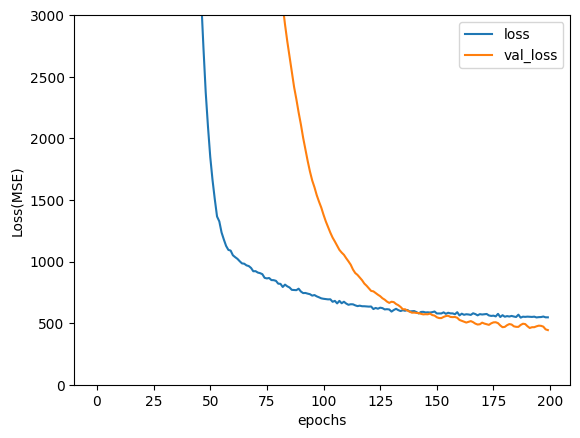

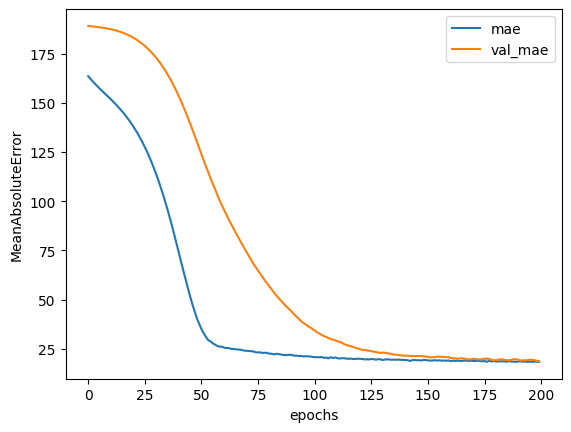

Best trial (test for office10):
  Value: 408.70652770996094
  Params: 
    activation: ELU
    batch_size: 32
    conv_layers_aircon: 2
    conv_layers_airvent: 2
    conv_layers_body: 3
    conv_layers_layout: 1
    dense_layers: 3
    dropout: None
    filters_aircon-0: 224
    filters_aircon-1: 224
    filters_airvent-0: 128
    filters_airvent-1: 64
    filters_body-0: 224
    filters_body-1: 96
    filters_body-2: 96
    filters_layout-0: 96
    lr: 2.259961164750641e-05
    units-0: 512
    units-1: 384
    units-2: 320


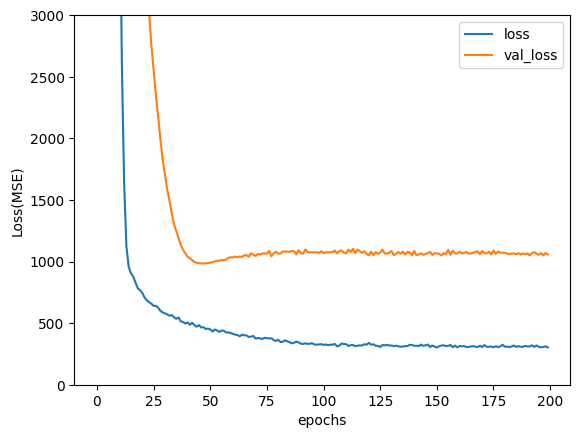

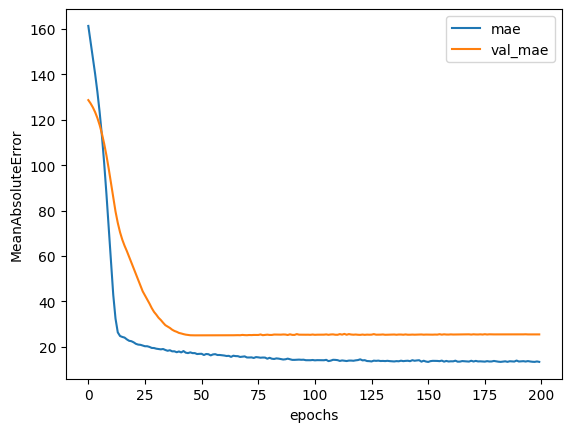

Best trial (test for office16):
  Value: 541.7028228759766
  Params: 
    activation: LeakyReLU
    batch_size: 64
    conv_layers_aircon: 1
    conv_layers_airvent: 3
    conv_layers_body: 2
    conv_layers_layout: 1
    dense_layers: 4
    dropout: None
    filters_aircon-0: 32
    filters_airvent-0: 192
    filters_airvent-1: 256
    filters_airvent-2: 96
    filters_body-0: 192
    filters_body-1: 128
    filters_layout-0: 160
    lr: 0.00017303353661973398
    units-0: 128
    units-1: 192
    units-2: 320
    units-3: 384


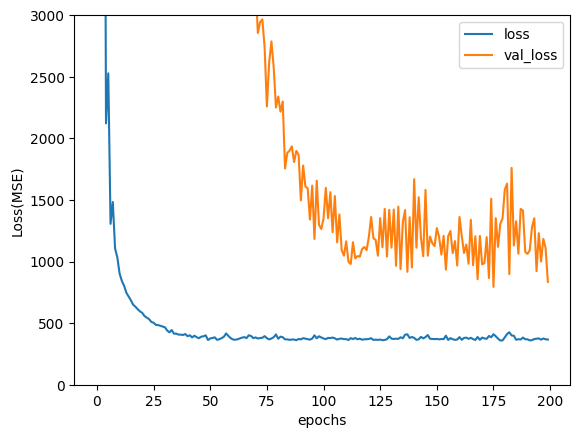

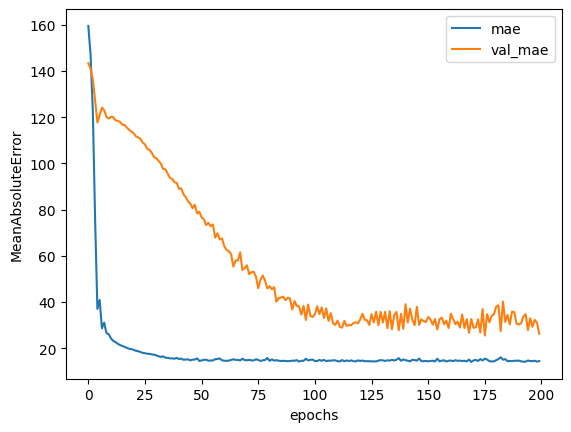

Best trial (test for office22):
  Value: 552.5176666259765
  Params: 
    activation: LeakyReLU
    batch_size: 32
    conv_layers_aircon: 3
    conv_layers_airvent: 1
    conv_layers_body: 3
    conv_layers_layout: 1
    dense_layers: 2
    dropout: 0.5
    filters_aircon-0: 32
    filters_aircon-1: 32
    filters_aircon-2: 128
    filters_airvent-0: 256
    filters_body-0: 32
    filters_body-1: 96
    filters_body-2: 160
    filters_layout-0: 224
    lr: 6.111377183013376e-05
    units-0: 320
    units-1: 256


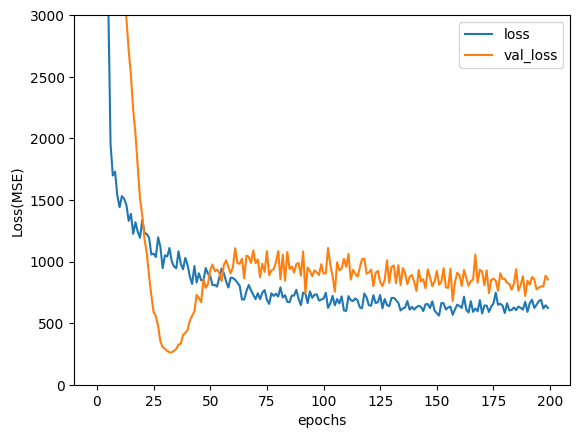

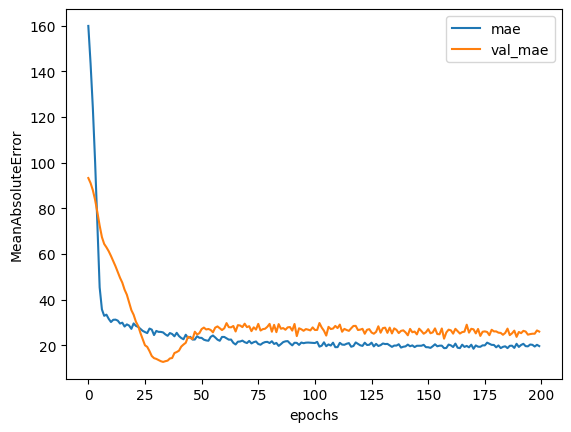

Best trial (test for office28):
  Value: 581.1790466308594
  Params: 
    batch_size: 64
    conv_layers_aircon: 1
    conv_layers_airvent: 1
    conv_layers_body: 3
    conv_layers_layout: 2
    dense_layers: 0
    filters_aircon-0: 256
    filters_airvent-0: 128
    filters_body-0: 160
    filters_body-1: 128
    filters_body-2: 32
    filters_layout-0: 64
    filters_layout-1: 96
    lr: 0.0005605830137360215


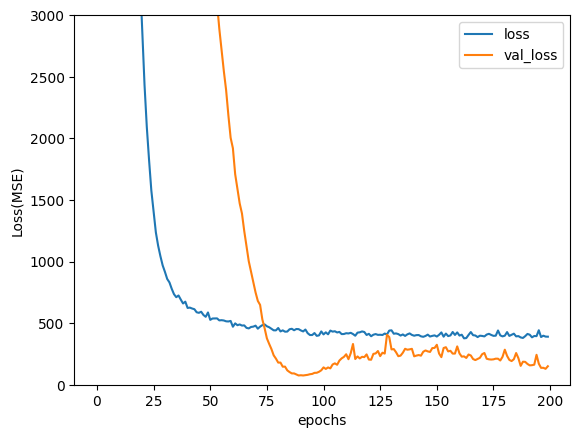

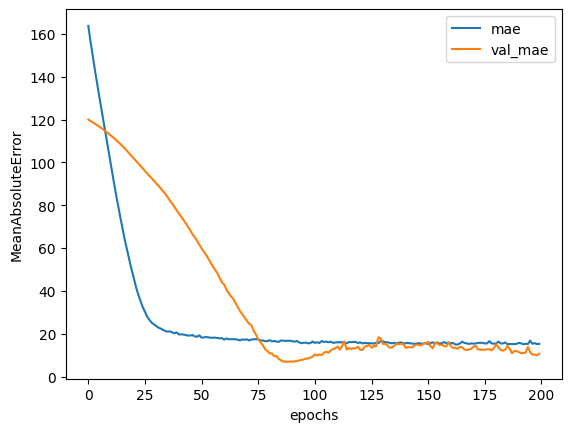

In [124]:
for test_office, result_dict in test_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
        
    plot_history(result_dict["history"].history, ymax=3000.)

test_office: office10
Epoch 1/200
7/7 [==============================] - 4s 112ms/step - loss: 27563.0527 - mae: 162.1791 - val_loss: 17636.4102 - val_mae: 129.0829
Epoch 2/200
7/7 [==============================] - 0s 33ms/step - loss: 24680.2363 - mae: 152.9875 - val_loss: 17243.6289 - val_mae: 127.5513
Epoch 3/200
7/7 [==============================] - 0s 34ms/step - loss: 22011.1465 - mae: 144.0097 - val_loss: 16794.3086 - val_mae: 125.7764
Epoch 4/200
7/7 [==============================] - 0s 35ms/step - loss: 19367.5762 - mae: 134.4280 - val_loss: 16269.9082 - val_mae: 123.6730
Epoch 5/200
7/7 [==============================] - 0s 34ms/step - loss: 16497.5430 - mae: 123.3929 - val_loss: 15657.9775 - val_mae: 121.1729
Epoch 6/200
7/7 [==============================] - 0s 32ms/step - loss: 13441.5654 - mae: 110.1514 - val_loss: 14935.7441 - val_mae: 118.1541
Epoch 7/200
7/7 [==============================] - 0s 41ms/step - loss: 10181.8008 - mae: 94.2362 - val_loss: 14104.9893 - va

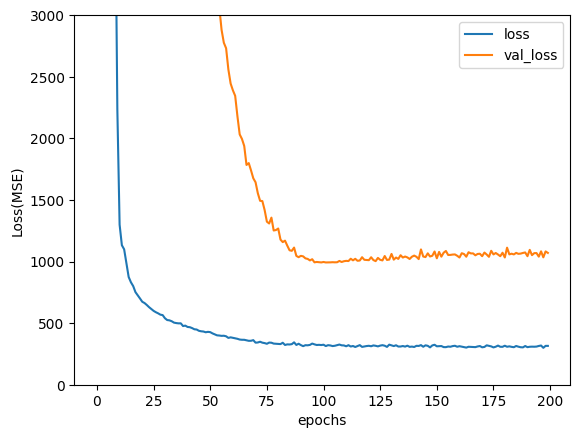

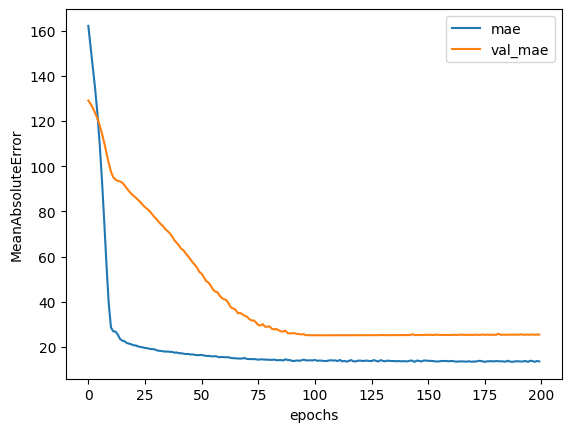

In [127]:
"""
最終テスト
only office10
"""

test_office="office10"

print("test_office:", test_office)
fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=True)
X_index_fit = X_index[fit_ID]

X_dict_fit={}
X_dict_test={}
for key, X in X_dict.items():
    X_dict_fit[key], X_dict_test[key] = X_dict[key][fit_ID], X_dict[key][test_ID]

y_fit, y_test = y[fit_ID], y[test_ID]

study_name = test_office + '_is_test'

loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)

test_history = best_model.fit(
    X_dict_fit, y_fit,
    batch_size = loaded_study.best_params["batch_size"],
    epochs = 200,
    validation_data = (X_dict_test, y_test),
    # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
)

print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

plot_history(test_history.history, ymax=3000.)

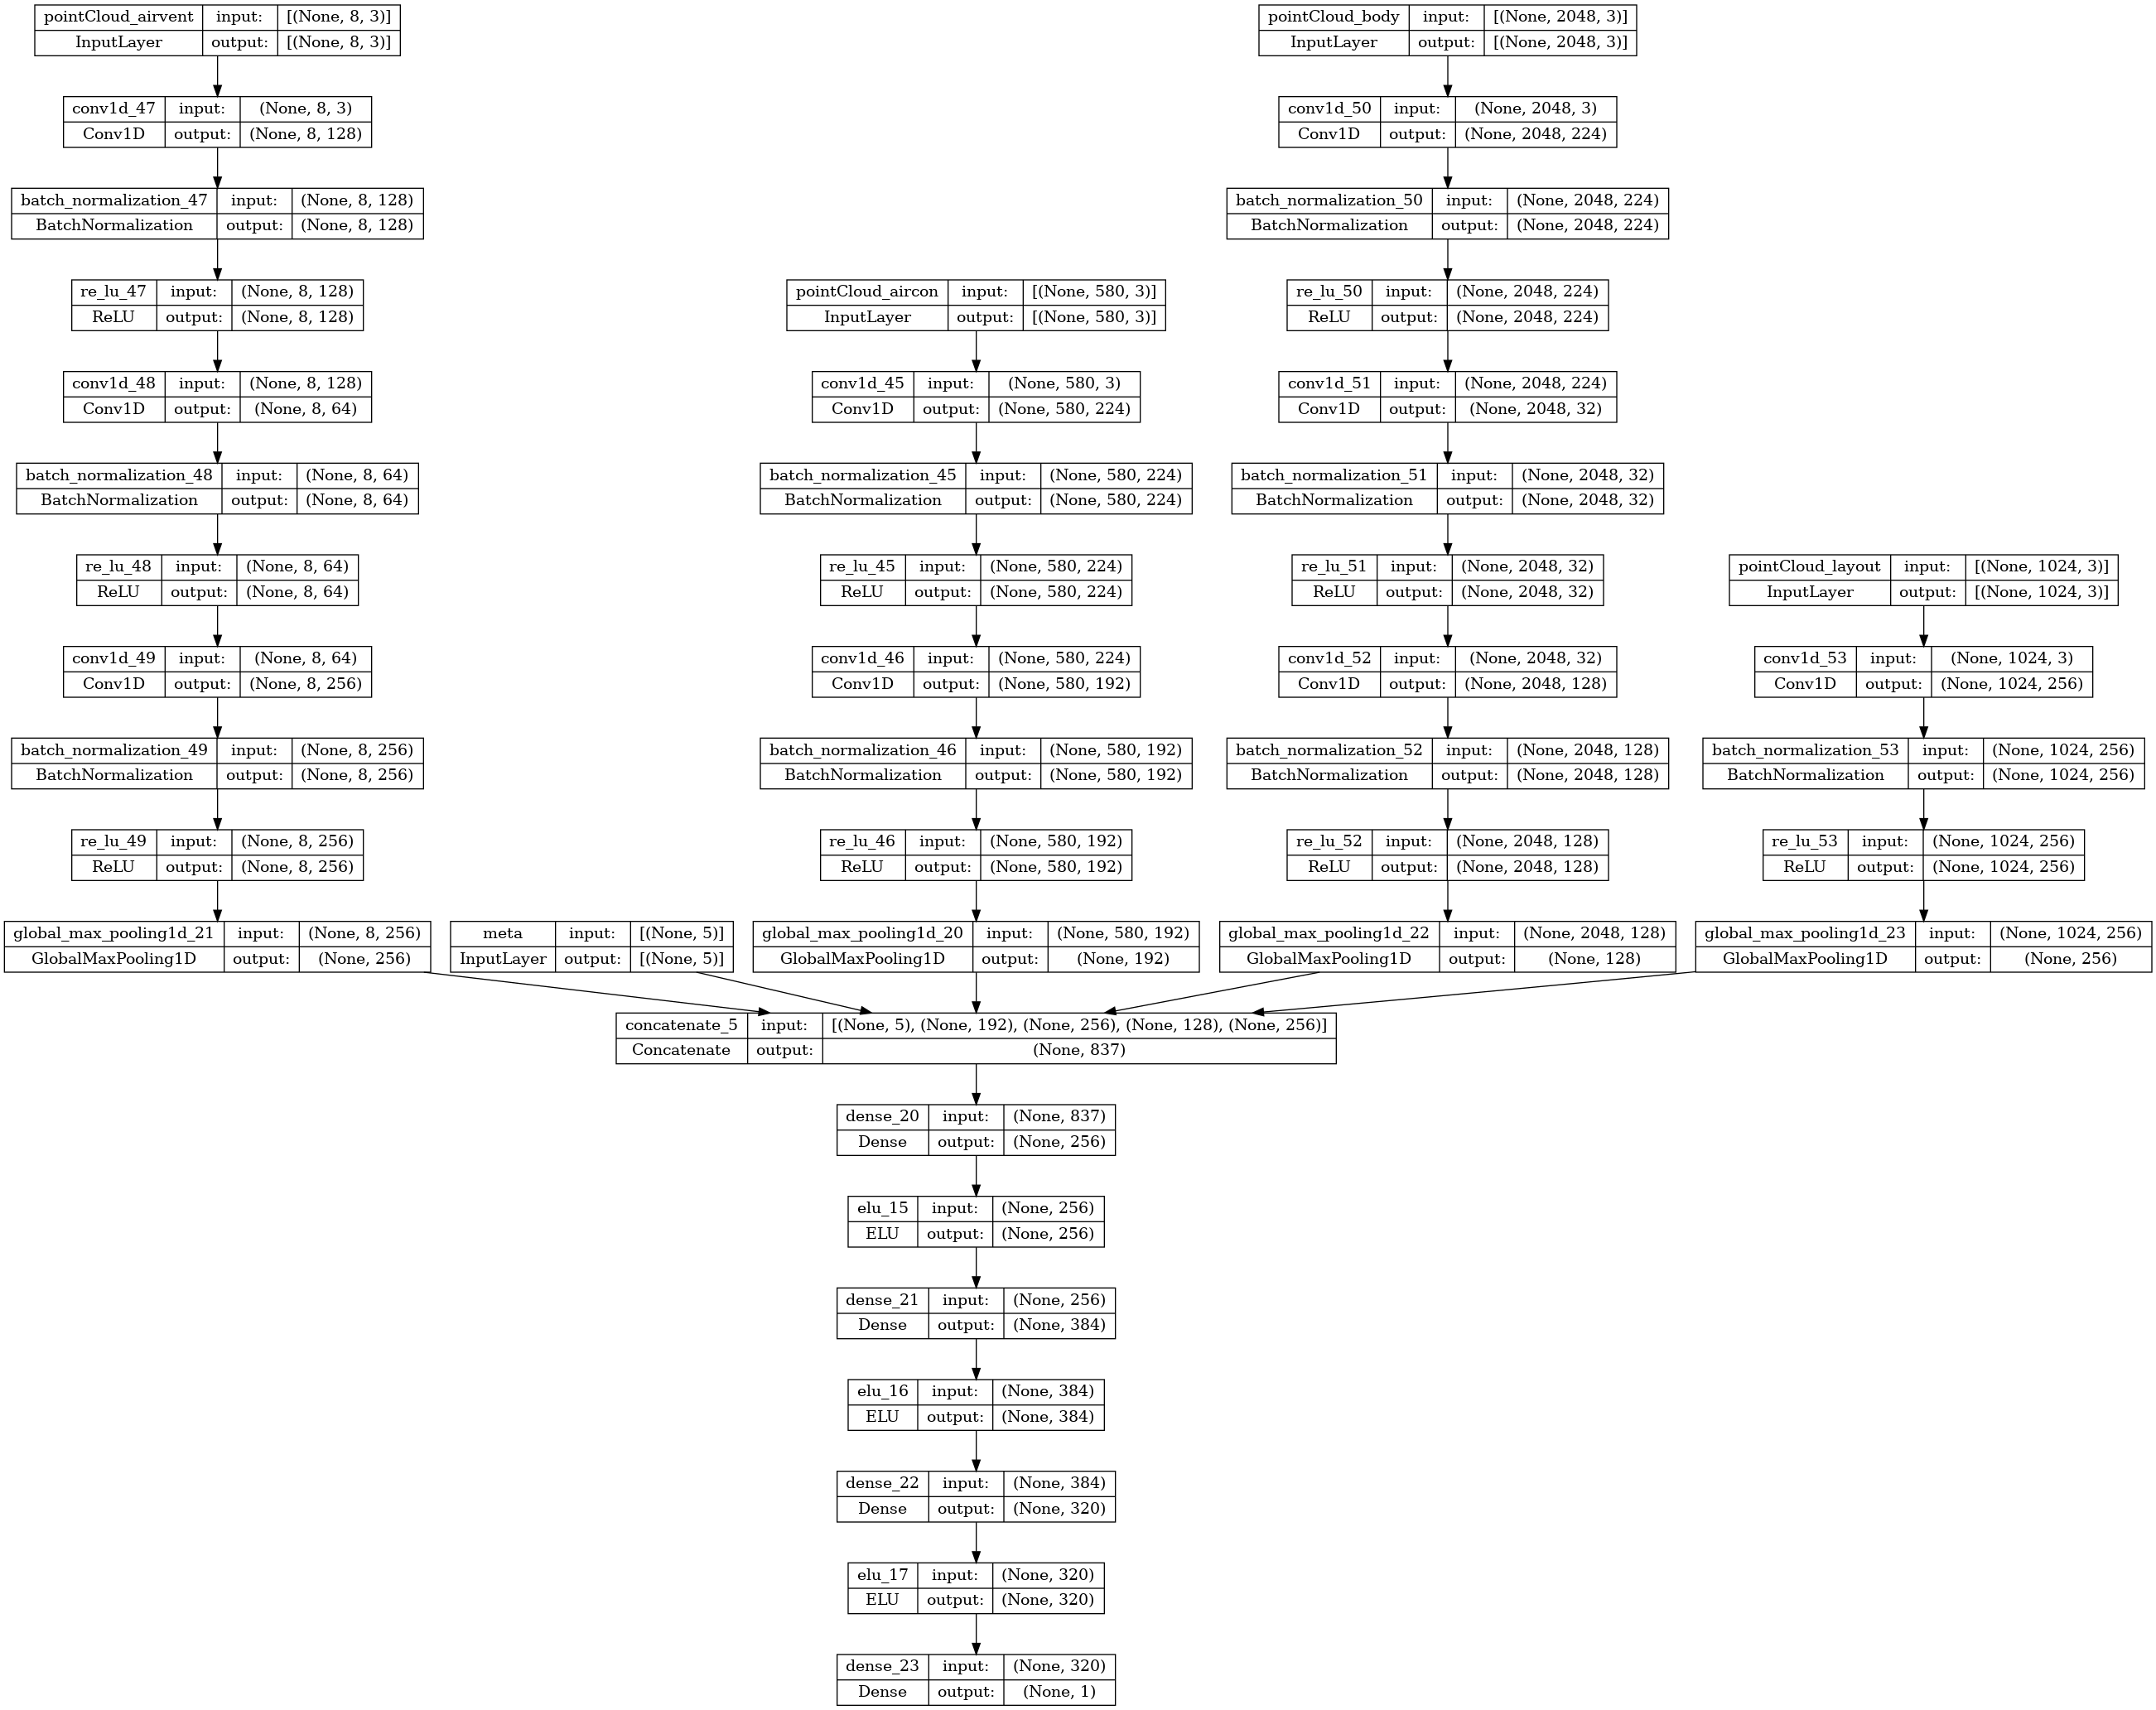

In [132]:
keras.utils.plot_model(best_model, show_shapes=True)

In [129]:
y_fit_pred = best_model.predict(X_dict_fit)
y_test_pred = best_model.predict(X_dict_test)

1/1 [==============================] - 0s 31ms/step


In [134]:
def show_office_residual_plot(train_x, train_y, test_x, test_y, office_array, figsize=[10, 8]):
    xlim = [min(min(train_x), min(test_x))-5, max(max(train_x), max(test_x))+5]
    fig= plt.figure(figsize=figsize)

    plt.figure(figsize=[10, 8])

    #カラーマップ等の準備
    markers = ("s", "x", "o", "^", "v", "<", ">", "1", "2", "3", "4", "8")
    colors = ("red", "blue", "limegreen", "gray", "cyan", "black", "purple", "green",
              "orange", "yellow", "crimson", "goldenrod", "orchid", "khaki", "darkgray")

    idx = 0
    for target_office_name in np.unique(office_list):
        if target_office_name == "office10":
            continue
            
        target_office_index = [i for i in range(len(office_array)) if target_office_name in  office_array[i]+'_']
        plt.scatter(train_x[target_office_index], train_y[target_office_index], 
                    s=80, c=colors[idx], marker=markers[2], edgecolor="white", label="Training:"+target_office_name)
        
        idx+=1
        
    plt.scatter(test_x, test_y, s=80, c="steelblue", marker="x", edgecolor="white", label="Test data")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc="best")
    plt.hlines(y=0, xmin=xlim[0], xmax=xlim[1], color="black", lw=2)
    plt.xlim(xlim)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_3403424/2292935587.py:23: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(test_x, test_y, s=80, c="steelblue", marker="x", edgecolor="white", label="Test data")


<Figure size 1000x800 with 0 Axes>

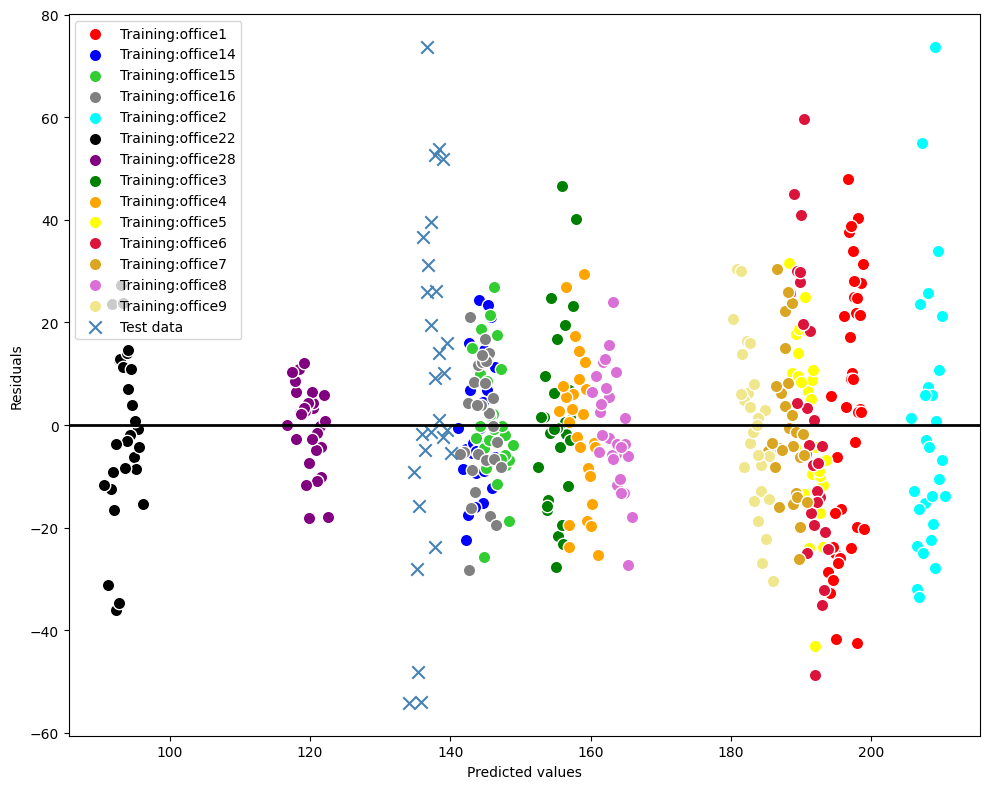

In [135]:
# #正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
# office_array = X_index.str.extract("(office+[0-9]{1,2})").to_numpy()

#残差プロット
show_office_residual_plot(train_x=y_fit_pred, train_y=y_fit_pred - y_fit.reshape((-1,1)), 
                            test_x=y_test_pred, test_y=y_test_pred - y_test.reshape((-1,1)), 
                            office_array=X_index_fit
                                  )

In [133]:
X_dict_fit

{'meta': array([[-1.38455178,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        [-1.38455178,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        ...,
        [ 0.44645519,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108, -0.68946029, -0.87131147,  1.14769521, -0.39824886],
        [ 0.44645519, -1.66695169, -0.87131147, -0.87131147,  2.51099278]]),
 'pointCloud_aircon': array([[[ 1.3765091 , -2.0106473 , -0.52029866],
         [ 1.3765091 , -1.8412895 , -0.52029866],
         [ 1.3765091 , -1.7396748 , -0.52029866],
         ...,
         [ 2.7313716 , -0.92675734, -0.52029866],
         [ 2.7313716 , -0.8251426 , -0.52029866],
         [ 2.7313716 , -0.6557848 , -0.52029866]],
 
        [[-0.6557848 , -0.99450046, -0.52029866],
         [-0.6557848 , -0.8251426 , -0.52029866],
         [-0.6557848 , -0.72352785, -0.52029866],
         ...,
         [ 0.6990778 ,  0

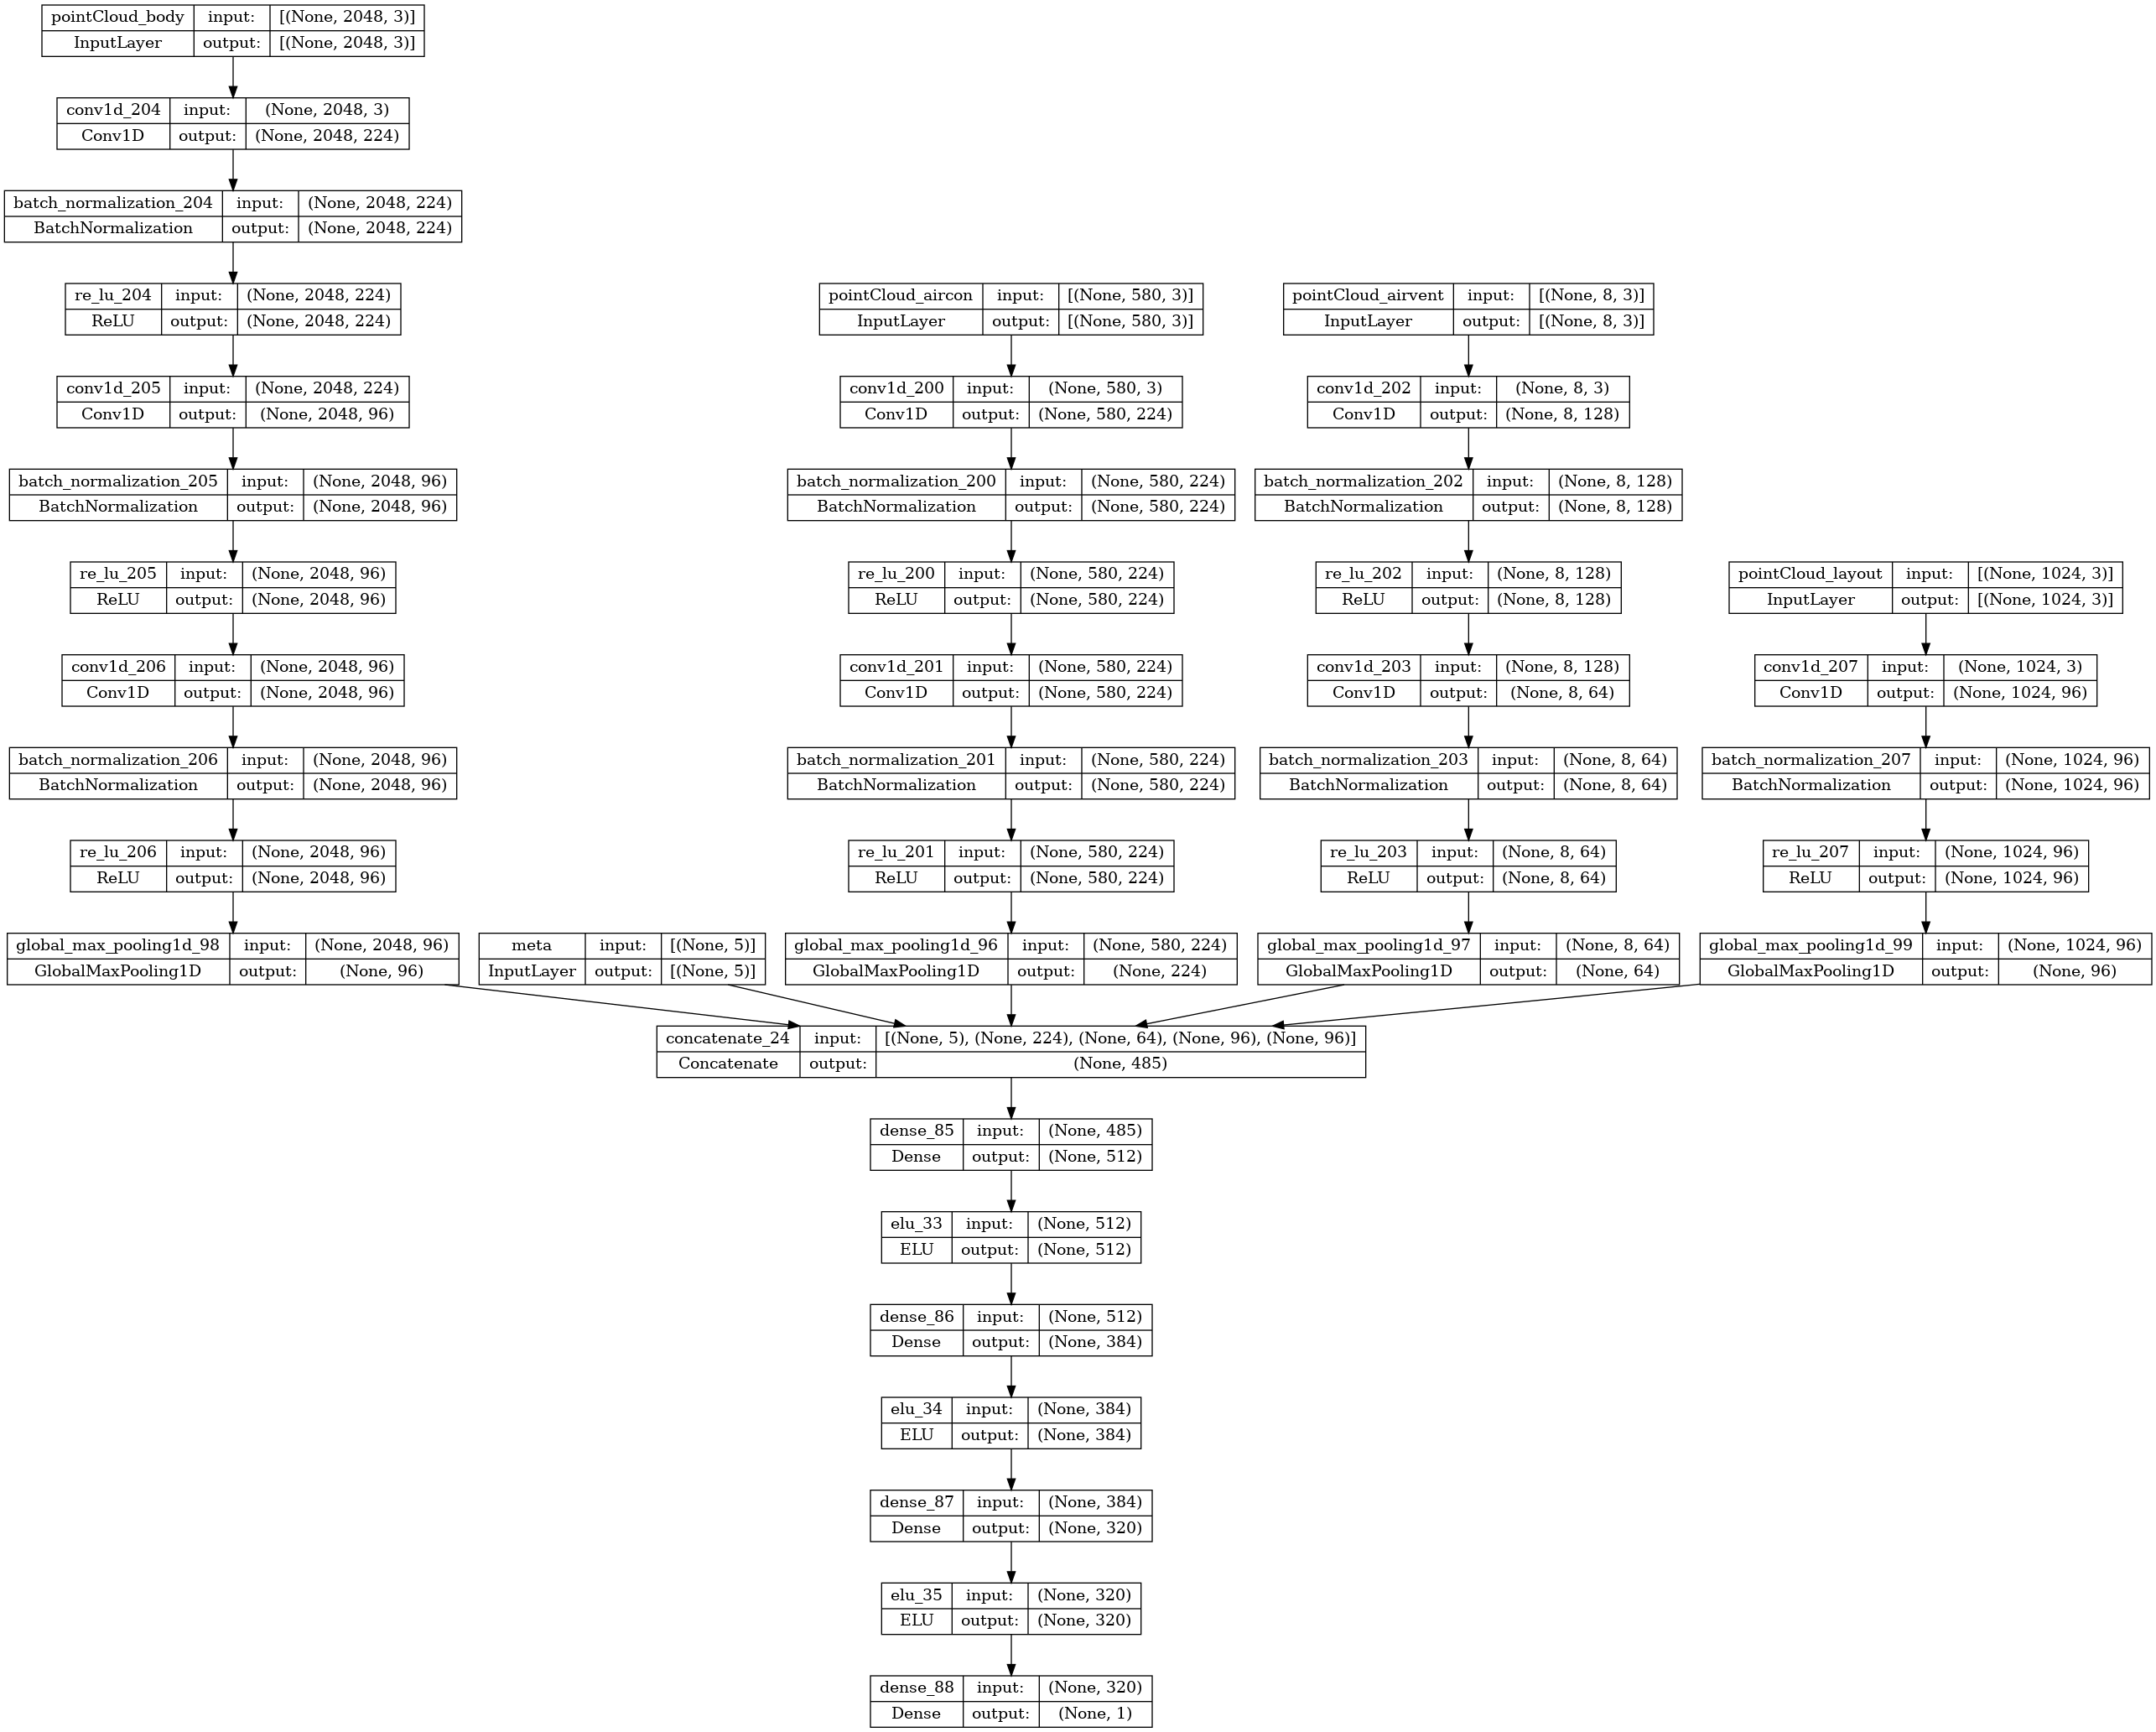

In [125]:
best_trial = test_dict["office10"]["best_trial"]

keras.utils.plot_model(total_model_builder(best_trial), show_shapes=True)

In [137]:
import gc
 
gc.collect()

38460

In [136]:
from keras.backend import clear_session

# Clear clutter from previous Keras session graphs.
clear_session()